In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [12]:
dataset = pd.read_csv("data/est_test_data.csv")
dataset.head()

,EST,EST_duration,Temperature_failure,Oxygen_failure,pH_failure
0,1,7200,37.0,5.0,7.2
1,1,7200,37.0,5.0,7.2
2,1,7200,36.9,5.0,7.4
3,1,7200,36.5,5.0,7.3
4,1,7200,36.5,5.0,7.2


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EST                  20 non-null     int64  
 1   EST_duration         20 non-null     int64  
 2   Temperature_failure  20 non-null     float64
 3   Oxygen_failure       20 non-null     float64
 4   pH_failure           20 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 928.0 bytes


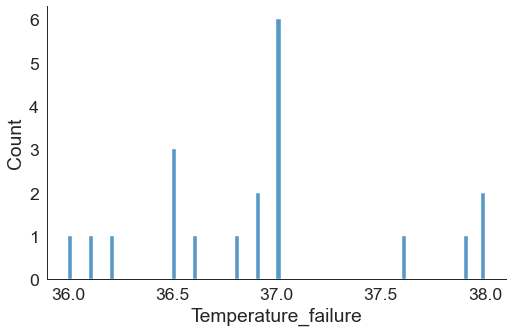

In [8]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

sns.displot(data=dataset, x="Temperature_failure", kind="hist", bins = 100, aspect = 1.5)

In [9]:
# Data Preparation
temperature_failure = dataset['Temperature_failure'].values

,sumsquare_error,aic,bic,kl_div
beta,340.898797,168.057389,68.699997,inf
lognorm,349.027776,184.009368,66.175582,inf
gamma,349.213960,182.698011,66.186247,inf
burr,349.490200,190.294411,69.197794,inf
norm,349.607410,179.694797,63.213036,inf


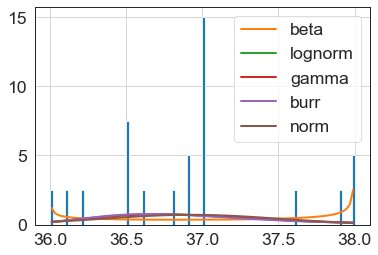

In [10]:
# Source: https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9
# Fitting distributions
f = Fitter(temperature_failure,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [13]:
x = dataset.to_numpy()
x

array([[1.00e+00, 7.20e+03, 3.70e+01, 5.00e+00, 7.20e+00],
       [1.00e+00, 7.20e+03, 3.70e+01, 5.00e+00, 7.20e+00],
       [1.00e+00, 7.20e+03, 3.69e+01, 5.00e+00, 7.40e+00],
       [1.00e+00, 7.20e+03, 3.65e+01, 5.00e+00, 7.30e+00],
       [1.00e+00, 7.20e+03, 3.65e+01, 5.00e+00, 7.20e+00],
       [1.00e+00, 7.20e+03, 3.70e+01, 5.00e+00, 7.40e+00],
       [1.00e+00, 7.20e+03, 3.70e+01, 5.00e+00, 7.40e+00],
       [1.00e+00, 7.20e+03, 3.68e+01, 5.00e+00, 7.30e+00],
       [0.00e+00, 4.32e+03, 3.66e+01, 4.00e+00, 7.20e+00],
       [0.00e+00, 2.88e+03, 3.60e+01, 2.00e+00, 6.90e+00],
       [0.00e+00, 5.76e+03, 3.65e+01, 5.00e+00, 6.90e+00],
       [0.00e+00, 2.88e+03, 3.62e+01, 5.00e+00, 7.20e+00],
       [0.00e+00, 4.32e+03, 3.70e+01, 4.50e+00, 7.40e+00],
       [0.00e+00, 2.88e+03, 3.61e+01, 2.00e+00, 6.90e+00],
       [0.00e+00, 2.88e+03, 3.76e+01, 3.00e+00, 7.30e+00],
       [0.00e+00, 4.32e+03, 3.79e+01, 5.00e+00, 7.20e+00],
       [1.00e+00, 7.20e+03, 3.69e+01, 5.00e+00, 7.40e+00

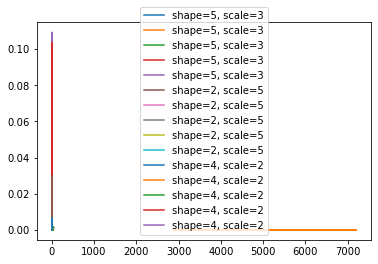

In [14]:
# Attemping gamma dist with varying alpha and beta
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#https://www.statology.org/gamma-distribution-in-python/
#define three Gamma distributions
y1 = stats.gamma.pdf(x, a=5, scale=3)
y2 = stats.gamma.pdf(x, a=2, scale=5)
y3 = stats.gamma.pdf(x, a=4, scale=2)

#add lines for each distribution
plt.plot(x, y1, label='shape=5, scale=3')
plt.plot(x, y2, label='shape=2, scale=5')
plt.plot(x, y3, label='shape=4, scale=2')

#add legend
plt.legend()

#display plot
plt.show()

